In [279]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model as lm

In [263]:
class LinearRegression:
    def __init__(self, X, Y, learning_rate: float):
        X, Y = np.array(X, dtype=float), np.array(Y) # Defensive copy
        # X => Feature Vectors of training set
        self.m, self.n = X.shape # m => No. of training examples, n => No. of features
        
        # feature_stats => (mean, stddev) for each feature
        self.feature_stats = [(np.mean(feature), np.std(feature)) for feature in X.T]
        
        # Mean Normalizing the features
        self.mean_normalize(X)
        
        self.X = [np.append(1, x).reshape(-1, 1) for x in X] # Feature (column)Vectors, x0 = 1
        self.Y = Y # Output corresponding to each feature vector
        self.learning_rate = learning_rate
        self.theta = np.random.rand(self.n + 1, 1)
    

    def mean_normalize(self, X: np.ndarray):
        for i, (feature, (mean, stddev)) in enumerate(zip(X.T, self.feature_stats)):
            X.T[i] = (feature - mean) / stddev


    # x => Feature Vector with x0 = 1 (n + 1 dimensional column vector)
    def h(self, x) -> float:
        return self.theta.T.dot(x)[0][0]
    

    def has_converged(self, new_theta) -> bool:
        return all(abs(new_theta - self.theta) < 10 ** -8)


    def gradient_descent(self):
        while True:
            gradient_vector = (1 / self.m) * sum([(self.h(x) - y) * x for x, y in zip(self.X, self.Y)])
            new_theta = self.theta - self.learning_rate * gradient_vector

            if self.has_converged(new_theta):
                break

            self.theta = new_theta
    

    # X => Feature Vectors (list of n dimensional row vectors)
    def predict(self, X) -> float:
        X = np.array(X, dtype=float)
        # Mean Normalizing the Feature Vectors
        self.mean_normalize(X)
        X = [np.append(1, x).reshape(-1, 1) for x in X] # adding x0 = 1
        return [self.h(x) for x in X]
    

    # Returns the Coefficient of determination R^2 for given X and Y
    # R^2 = 1 - (RSS / TSS), where RSS => Residual Sum of Squares and TSS => Total Sum of Squares
    # When the model predicts everything correctly, RSS = 0 and R^2 = 1
    # When the model predicts only the mean of Y, RSS = TSS which gives R^2 = 0
    def score(self, X, Y) -> float:
        pred_Y = self.predict(X)
        rss = sum((pred_Y - Y) ** 2)
        tss = sum((Y - np.mean(Y)) ** 2)
        return 1 - (rss / tss)

In [282]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Univariate Linear Regression

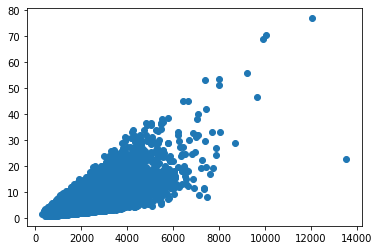

In [283]:
plt.scatter(df['sqft_living'], df['price'] / 10 ** 5)

In [284]:
X = np.array(list(zip(df['sqft_living'])))
Y = np.array(df['price'] / 10 ** 5)
print(X)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [265]:
model = LinearRegression(X, Y, 1)
model.gradient_descent()

In [266]:
model.theta

array([[5.40088142],
       [2.57730199]])

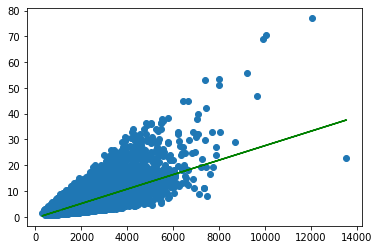

In [267]:
plt.scatter(df['sqft_living'], df['price'] / 10 ** 5)
plt.plot(X, model.predict(X), color='green')

In [268]:
b_model = lm.LinearRegression().fit(X, Y)
b_model.coef_, b_model.intercept_

(array([0.00280624]), -0.4358074309447355)

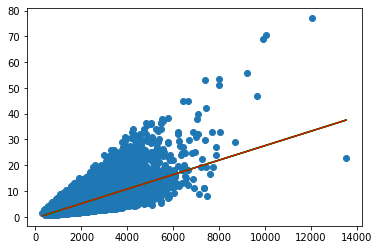

In [269]:
plt.scatter(df['sqft_living'], df['price'] / 10 ** 5)
plt.plot(X, model.predict(X), color='green')
plt.plot(X, b_model.predict(X), color='red', linestyle='dotted')

In [270]:
print(model.predict([[1000], [2000], [3000]]))
print(b_model.predict([[1000], [2000], [3000]]))

[2.3704282480297474, 5.176663927004228, 7.982899605978707]
[2.37042825 5.17666393 7.98289961]


In [271]:
print(model.score(X, Y))
print(b_model.score(X, Y))

0.49285321790379977
0.4928532179037932


### Multivariate Linear Regression

* Using more relavant features can yield better R^2 values

In [272]:
mul_X = np.array(list(zip(df['sqft_living'], df['bedrooms'], df['floors'], df['yr_built'])))
mul_X

array([[1.180e+03, 3.000e+00, 1.000e+00, 1.955e+03],
       [2.570e+03, 3.000e+00, 2.000e+00, 1.951e+03],
       [7.700e+02, 2.000e+00, 1.000e+00, 1.933e+03],
       ...,
       [1.020e+03, 2.000e+00, 2.000e+00, 2.009e+03],
       [1.600e+03, 3.000e+00, 2.000e+00, 2.004e+03],
       [1.020e+03, 2.000e+00, 2.000e+00, 2.008e+03]])

In [273]:
mul_model = LinearRegression(mul_X, Y, 0.7)
mul_model.gradient_descent()

In [286]:
mul_model.theta

array([[ 5.40088142],
       [ 3.03452212],
       [-0.55212712],
       [ 0.39326774],
       [-0.87414724]])

The Above theta values suggest that:

* The price increases with increase in *sqft_living* and *floors*

* The price decreases with increase in *bedrooms* and *year_built*

In [274]:
b_mul_model = lm.LinearRegression().fit(mul_X, Y)

In [287]:
b_mul_model.intercept_, b_mul_model.coef_

(58.0996703940321, array([ 0.00330407, -0.59365938,  0.7283054 , -0.0297605 ]))

In [288]:
print(mul_model.score(mul_X, Y))
print(b_mul_model.score(mul_X, Y))

0.5485603001821243
0.548560300182119
